Caret is the Sklearn equivalent for R it's a great R package which provides general interface to more than 150 ML algorithms. It also provides great functions to sample the data (for training and testing), preprocessing, evaluating the model etc.,

For more info on Caret goto:
https://www.youtube.com/watch?v=7Jbb2ItbTC4 


In [1]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
library(e1071)#support package to caret

# 0. Load data

In [3]:
# library(ISLR) #using smarket: Daily percentage returns for the S&P 500 stock index between 2001 and 2005

In [19]:
#import and read data
df <- read.csv("Offlinedf.csv", header = TRUE)

# 1. Data description

In [20]:
head(df)

X,posX,posY,angle,X00.14.bf.b1.97.8a,X00.14.bf.b1.97.90,X00.0f.a3.39.e1.c0,X00.14.bf.b1.97.8d,X00.14.bf.b1.97.81,X00.14.bf.3b.c7.c6,X00.0f.a3.39.dd.cd
1,0,0,0,-41.98489,-57.20774,-51.15455,-64.55649,-62.84349,-65.38813,-68.13182
2,0,1,0,-44.97125,-58.22891,-50.57273,-61.07673,-67.18656,-65.19788,-70.33636
3,0,2,0,-47.72008,-58.70679,-59.95455,-61.81601,-61.18764,-61.26058,-68.49831
4,0,3,0,-51.10097,-56.79017,-55.53636,-58.28706,-56.71622,-62.36238,-69.08939
5,0,4,0,-49.08489,-53.58976,-48.09091,-63.42386,-57.11135,-64.77592,-68.96818
6,0,7,0,-46.97932,-62.51826,-57.30000,-55.15113,-64.02953,-64.57951,-71.43636




Description:




# 2. DATA EXPLORATION

In [26]:
str(df)

'data.frame':	166 obs. of  11 variables:
 $ X                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ posX              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ posY              : int  0 1 2 3 4 7 8 9 10 11 ...
 $ angle             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X00.14.bf.b1.97.8a: num  -42 -45 -47.7 -51.1 -49.1 ...
 $ X00.14.bf.b1.97.90: num  -57.2 -58.2 -58.7 -56.8 -53.6 ...
 $ X00.0f.a3.39.e1.c0: num  -51.2 -50.6 -60 -55.5 -48.1 ...
 $ X00.14.bf.b1.97.8d: num  -64.6 -61.1 -61.8 -58.3 -63.4 ...
 $ X00.14.bf.b1.97.81: num  -62.8 -67.2 -61.2 -56.7 -57.1 ...
 $ X00.14.bf.3b.c7.c6: num  -65.4 -65.2 -61.3 -62.4 -64.8 ...
 $ X00.0f.a3.39.dd.cd: num  -68.1 -70.3 -68.5 -69.1 -69 ...


In [27]:
summary(df)

       X               posX            posY            angle  
 Min.   :  1.00   Min.   : 0.00   Min.   : 0.000   Min.   :0  
 1st Qu.: 42.25   1st Qu.: 3.00   1st Qu.: 3.000   1st Qu.:0  
 Median : 83.50   Median :13.00   Median : 6.500   Median :0  
 Mean   : 83.50   Mean   :14.25   Mean   : 5.916   Mean   :0  
 3rd Qu.:124.75   3rd Qu.:23.00   3rd Qu.: 8.000   3rd Qu.:0  
 Max.   :166.00   Max.   :33.00   Max.   :13.000   Max.   :0  
 X00.14.bf.b1.97.8a X00.14.bf.b1.97.90 X00.0f.a3.39.e1.c0 X00.14.bf.b1.97.8d
 Min.   :-70.02     Min.   :-79.51     Min.   :-64.21     Min.   :-67.31    
 1st Qu.:-61.70     1st Qu.:-73.68     1st Qu.:-57.06     1st Qu.:-58.93    
 Median :-57.49     Median :-68.75     Median :-53.50     Median :-55.16    
 Mean   :-56.44     Mean   :-66.26     Mean   :-53.38     Mean   :-54.86    
 3rd Qu.:-51.13     3rd Qu.:-59.09     3rd Qu.:-49.87     3rd Qu.:-51.36    
 Max.   :-40.37     Max.   :-40.23     Max.   :-42.79     Max.   :-39.76    
 X00.14.bf.b1.97.81 

In [25]:
colnames(df, do.NULL = TRUE, prefix = "col")

[1] "X"                  "posX"               "posY"              
 [4] "angle"              "X00.14.bf.b1.97.8a" "X00.14.bf.b1.97.90"
 [7] "X00.0f.a3.39.e1.c0" "X00.14.bf.b1.97.8d" "X00.14.bf.b1.97.81"
[10] "X00.14.bf.3b.c7.c6" "X00.0f.a3.39.dd.cd"

# 3. PREPROCESSING
(clean up the data to get it ready to pass it in the machine)

In [45]:
# check for na and impute or remove na 
is.na(df)

 logi [1:166, 1:11] FALSE FALSE FALSE FALSE FALSE FALSE ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:11] "X" "posX" "posY" "angle" ...


In [50]:
#2. TODO: variable imputation check and replace missing value using knn
#remove na quick fix
df2 <- na.omit(df) 

In [51]:
str(df2) ### no value remove

'data.frame':	166 obs. of  11 variables:
 $ X                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ posX              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ posY              : int  0 1 2 3 4 7 8 9 10 11 ...
 $ angle             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X00.14.bf.b1.97.8a: num  -42 -45 -47.7 -51.1 -49.1 ...
 $ X00.14.bf.b1.97.90: num  -57.2 -58.2 -58.7 -56.8 -53.6 ...
 $ X00.0f.a3.39.e1.c0: num  -51.2 -50.6 -60 -55.5 -48.1 ...
 $ X00.14.bf.b1.97.8d: num  -64.6 -61.1 -61.8 -58.3 -63.4 ...
 $ X00.14.bf.b1.97.81: num  -62.8 -67.2 -61.2 -56.7 -57.1 ...
 $ X00.14.bf.3b.c7.c6: num  -65.4 -65.2 -61.3 -62.4 -64.8 ...
 $ X00.0f.a3.39.dd.cd: num  -68.1 -70.3 -68.5 -69.1 -69 ...


In [6]:
# 1. Split train and test set

In [57]:
set.seed(300) 
#Spliting data as training and test set. Using createDataPartition() function from caret
indxTrain <- createDataPartition(y = df$posY,p = 0.75,list = FALSE)
training <- df[indxTrain,]
testing <- df[-indxTrain,]

In [60]:
str(training)

'data.frame':	126 obs. of  11 variables:
 $ X                 : int  1 2 3 5 6 9 10 11 12 13 ...
 $ posX              : int  0 0 0 0 0 0 0 0 0 1 ...
 $ posY              : int  0 1 2 4 7 10 11 12 13 0 ...
 $ angle             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X00.14.bf.b1.97.8a: num  -42 -45 -47.7 -49.1 -47 ...
 $ X00.14.bf.b1.97.90: num  -57.2 -58.2 -58.7 -53.6 -62.5 ...
 $ X00.0f.a3.39.e1.c0: num  -51.2 -50.6 -60 -48.1 -57.3 ...
 $ X00.14.bf.b1.97.8d: num  -64.6 -61.1 -61.8 -63.4 -55.2 ...
 $ X00.14.bf.b1.97.81: num  -62.8 -67.2 -61.2 -57.1 -64 ...
 $ X00.14.bf.3b.c7.c6: num  -65.4 -65.2 -61.3 -64.8 -64.6 ...
 $ X00.0f.a3.39.dd.cd: num  -68.1 -70.3 -68.5 -69 -71.4 ...


In [66]:
# variabe standardization or normalized or (centered and scaled). using the caret pre-process  object
trainX <- training[,names(training)!= "angle"] ## remove not numerical column
preProcObj <- preProcess(x = trainX,method = c("center", "scale"))
preProcObj

Created from 126 samples and 10 variables

Pre-processing:
  - centered (10)
  - ignored (0)
  - scaled (10)


In [67]:
preProc_trainX <- predict(preProcObj, trainX)

In [68]:
head(preProc_trainX)

,X,posX,posY,X00.14.bf.b1.97.8a,X00.14.bf.b1.97.90,X00.0f.a3.39.e1.c0,X00.14.bf.b1.97.8d,X00.14.bf.b1.97.81,X00.14.bf.3b.c7.c6,X00.0f.a3.39.dd.cd
1,-1.659021,-1.289539,-2.1100743,1.9044714,0.8973503,0.4484205,-1.696633826,-1.04925819,-1.0151552,0.27643033
2,-1.638267,-1.289539,-1.7527230,1.4999809,0.7905687,0.5755244,-1.071775361,-1.81037445,-0.9794307,-0.04431562
3,-1.617512,-1.289539,-1.3953717,1.1276640,0.7405972,-1.4740264,-1.204528599,-0.75907261,-0.2401244,0.22310905
5,-1.576004,-1.289539,-0.6806691,0.9428061,1.2756749,1.1177021,-1.493248391,-0.04470837,-0.9001997,0.15474527
6,-1.555250,-1.289539,0.3913847,1.2279965,0.3420400,-0.8941147,-0.007720591,-1.25710941,-0.8633196,-0.20435793
9,-1.492987,-1.289539,1.4634386,1.2972688,1.6833057,-0.6538089,-1.923320589,-0.99859798,-0.7975301,0.12101735


In [69]:
summary(preProc_trainX)

       X                  posX              posY         X00.14.bf.b1.97.8a
 Min.   :-1.659021   Min.   :-1.2895   Min.   :-2.1101   Min.   :-1.8933   
 1st Qu.:-0.885926   1st Qu.:-1.1012   1st Qu.:-1.0380   1st Qu.:-0.7026   
 Median :-0.009059   Median :-0.1121   Median : 0.2127   Median :-0.1469   
 Mean   : 0.000000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   
 3rd Qu.: 0.826299   3rd Qu.: 0.8769   3rd Qu.: 0.7487   3rd Qu.: 0.8738   
 Max.   : 1.765427   Max.   : 1.8188   Max.   : 2.5355   Max.   : 2.1226   
 X00.14.bf.b1.97.90 X00.0f.a3.39.e1.c0 X00.14.bf.b1.97.8d X00.14.bf.b1.97.81
 Min.   :-1.4344    Min.   :-2.40347   Min.   :-2.19186   Min.   :-2.2712   
 1st Qu.:-0.8881    1st Qu.:-0.77992   1st Qu.:-0.66842   1st Qu.:-0.6611   
 Median :-0.2820    Median : 0.01608   Median :-0.07329   Median :-0.0161   
 Mean   : 0.0000    Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.0000   
 3rd Qu.: 0.7383    3rd Qu.: 0.72150   3rd Qu.: 0.57374   3rd Qu.: 0.5794   
 Max. 

# 4. FIT MODEL & PREDICT

In [33]:
# multi-variate knn-reg
#predictor (dependent variable ): tem <- df[c("posX","posY")]
#knn.reg(train, test = NULL, y, k = 3, algorithm=c("kd_tree", 
#         "cover_tree", "brute"))

In [73]:
set.seed(400)
ctrl <- trainControl(method="repeatedcv",repeats = 3) # default 10 fold cross validation during training and do 3 time the 10 fold CV
knnFit <- train(posX+posY ~ ., data = trainX, method = "knn", trControl = ctrl, preProcess = c("center","scale"), tuneLength = 20)##tuneLengh to atomatically try 20  k value

#Output of kNN fit
knnFit

k-Nearest Neighbors 

126 samples
  9 predictor

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 114, 114, 114, 114, 113, 114, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   5  2.716024  0.9440394  2.227332
   7  2.650438  0.9472155  2.207230
   9  2.691576  0.9471843  2.239333
  11  2.765788  0.9435548  2.315404
  13  2.895297  0.9378326  2.414175
  15  3.020904  0.9319561  2.530275
  17  3.117368  0.9283115  2.610798
  19  3.217065  0.9238760  2.706929
  21  3.301822  0.9212827  2.798961
  23  3.407500  0.9164936  2.897397
  25  3.488158  0.9133447  2.978976
  27  3.577728  0.9094007  3.054768
  29  3.645782  0.9060250  3.121095
  31  3.721265  0.9024123  3.177168
  33  3.762390  0.9007355  3.203056
  35  3.801445  0.8991293  3.233293
  37  3.830315  0.8997095  3.239447
  39  3.884289  0.8984485  3.274489
  41  3.964831  0.8971084  3.325787
  43  4.061732  0.8965864 

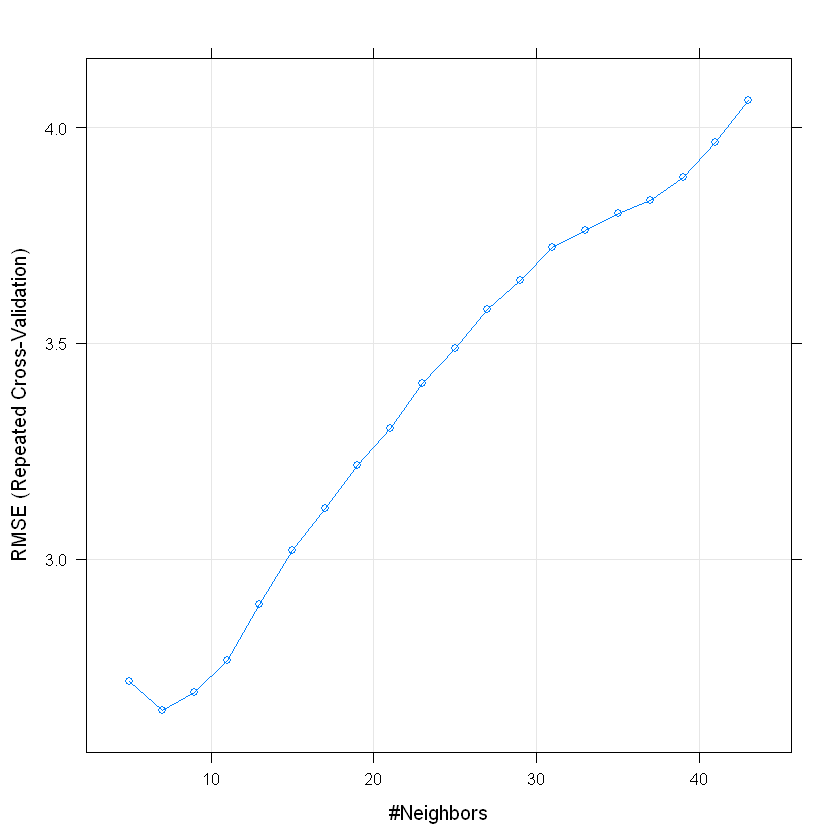

In [71]:
#Plotting yields Number of Neighbours Vs accuracy (based on repeated cross validation)
plot(knnFit)

In [74]:
knnPredict <- predict(knnFit,newdata = testing )
#Get the confusion matrix to see accuracy value and other parameter values
confusionMatrix(knnPredict, testing$Direction )

ERROR: Error: `data` and `reference` should be factors with the same levels.


In [ ]:
#### run the model removing one at the time 
00:0f:a3:39:dd:cd

00:0f:a3:39:e1:c0
